In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
%matplotlib inline

Exercise:
Enter the parameters $\alpha=$ date of birth; $\beta=$ month of birth.

a) Analyze the ARMA(1,1) model with parameters $\theta_1=\alpha\%; \phi_1=\beta\%;$

b) Analyze the ARMA(1,1) model with parameters $\theta_1=\alpha\%; \theta_2=\beta\%; \phi_1=\beta\%; \phi_2=\alpha\%$

In [4]:
alpha = 19
beta = 11

In [5]:
#ARMA(1,1)
ar_a = np.array([beta/100])
ma_a = np.array([alpha/100])
ARMA_11 = ArmaProcess.from_coeffs(ar_a, ma_a)

In [6]:

print('Invertibility of time series:', ARMA_11.isinvertible)
print('Stationality of the time series:', ARMA_11.isstationary)
print('Polynomial MA:', ARMA_11.mapoly)
print('MA polynomial roots of a time series: ', ARMA_11.maroots)
print('Polynomial AR:', ARMA_11.arpoly)
print('AR polynomial roots of a time series: ', ARMA_11.arroots)
print('acf values:', np.round(ARMA_11.acf(10),4)) 
print('acvf values:', np.round(ARMA_11.acovf(10),4)) 
print( 'Convert ARMA to MA: ', ARMA_11.arma2ma(10))
print('Convert ARMA to AR: ', ARMA_11.arma2ar(10))

Invertibility of time series: True
Stationality of the time series: True
Polynomial MA: 1.0 + 0.19 x
MA polynomial roots of a time series:  [-5.26315789]
Polynomial AR: 1.0 - 0.11 x
AR polynomial roots of a time series:  [9.09090909]
acf values: [1.000e+00 2.841e-01 3.130e-02 3.400e-03 4.000e-04 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
acvf values: [1.0911e+00 3.1000e-01 3.4100e-02 3.8000e-03 4.0000e-04 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
Convert ARMA to MA:  [1.00000000e+00 3.00000000e-01 3.30000000e-02 3.63000000e-03
 3.99300000e-04 4.39230000e-05 4.83153000e-06 5.31468300e-07
 5.84615130e-08 6.43076643e-09]
Convert ARMA to AR:  [ 1.00000000e+00 -3.00000000e-01  5.70000000e-02 -1.08300000e-02
  2.05770000e-03 -3.90963000e-04  7.42829700e-05 -1.41137643e-05
  2.68161522e-06 -5.09506891e-07]


In [7]:
data_ARMA_11 = ARMA_11.generate_sample(nsample=10000)
data_ARMA_11.shape

(10000,)

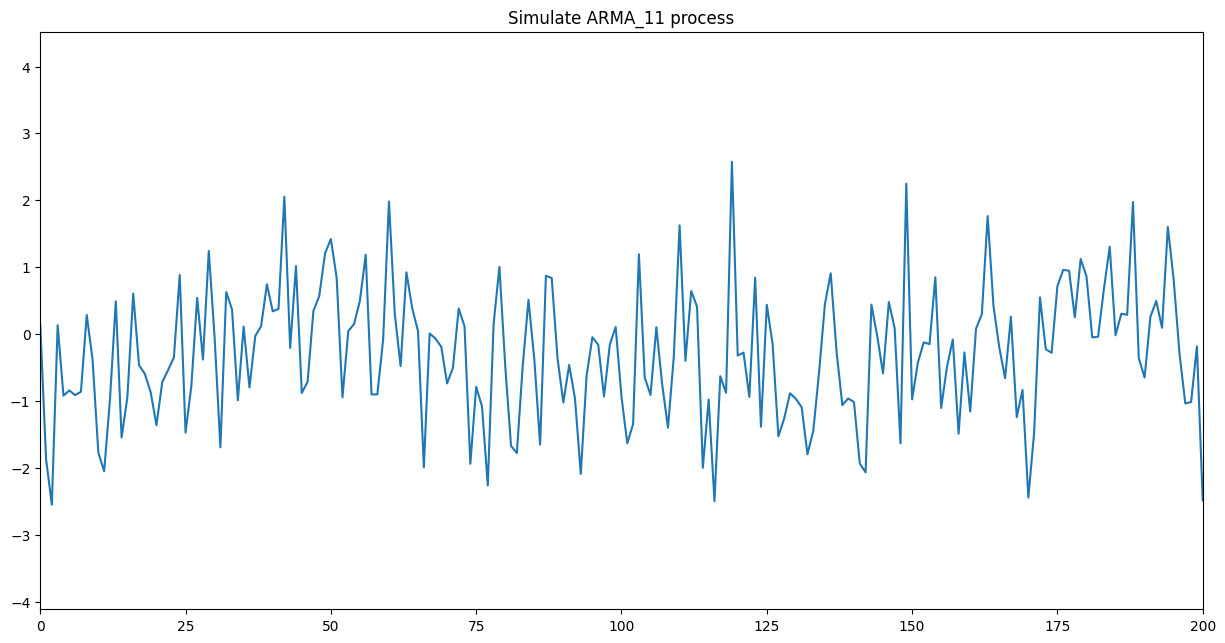

In [8]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data_ARMA_11)
plt.title("Simulate ARMA_11 process")
plt.xlim([0, 200])
plt.show()

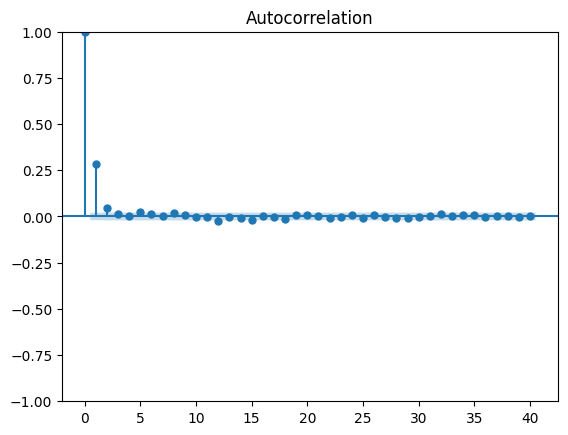

In [9]:
plot_acf(data_ARMA_11)
plt.show()

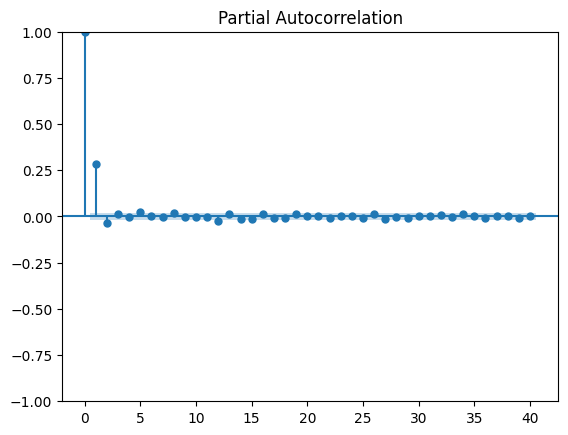

In [10]:
plot_pacf(data_ARMA_11)
plt.show()

In [13]:
#ARMA(2,2)
ar_b = np.array([beta/100, alpha/100])
ma_b = np.array([alpha/100, beta/100])
ARMA_22 = ArmaProcess.from_coeffs(ar_b, ma_b)

In [14]:

print('Invertibility of time series:', ARMA_22.isinvertible)
print('Stationality of the time series:', ARMA_22.isstationary)
print('Polynomial MA:', ARMA_22.mapoly)
print('MA polynomial roots of a time series: ', ARMA_22.maroots)
print('Polynomial AR:', ARMA_22.arpoly)
print('AR polynomial roots of a time series: ', ARMA_22.arroots)
print('acf values:', np.round(ARMA_22.acf(10),4)) 
print('acvf values:', np.round(ARMA_22.acovf(10),4)) 
print( 'Convert ARMA to MA: ', ARMA_22.arma2ma(10))
print('Convert ARMA to AR: ', ARMA_22.arma2ar(10))

Invertibility of time series: True
Stationality of the time series: True
Polynomial MA: 1.0 + 0.19 x + 0.11 x**2
MA polynomial roots of a time series:  [-0.86363636-2.88877852j -0.86363636+2.88877852j]
Polynomial AR: 1.0 - 0.11 x - 0.19 x**2
AR polynomial roots of a time series:  [-2.60182161  2.02287424]
acf values: [1.     0.3622 0.3203 0.104  0.0723 0.0277 0.0168 0.0071 0.004  0.0018]
acvf values: [1.2161 0.4405 0.3895 0.1265 0.0879 0.0337 0.0204 0.0087 0.0048 0.0022]
Convert ARMA to MA:  [1.         0.3        0.333      0.09363    0.0735693  0.02588232
 0.01682522 0.00676842 0.00394132 0.00171954]
Convert ARMA to AR:  [ 1.00000000e+00 -3.00000000e-01 -2.43000000e-01  7.91700000e-02
  1.16877000e-02 -1.09293630e-02  7.90931970e-04  1.05195286e-03
 -2.86873559e-04 -6.12088379e-05]


In [15]:
data_ARMA_22 = ARMA_22.generate_sample(nsample=10000)


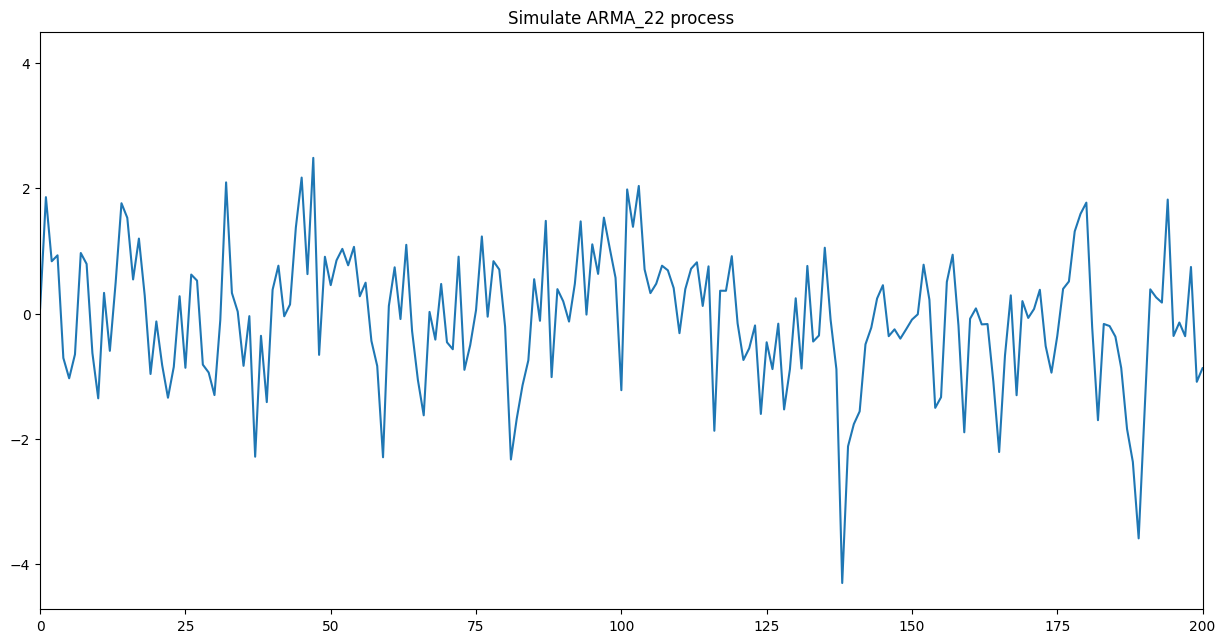

In [16]:
plt.figure(figsize=[15, 7.5]);
plt.plot(data_ARMA_22)
plt.title("Simulate ARMA_22 process")
plt.xlim(0,200)
plt.show()

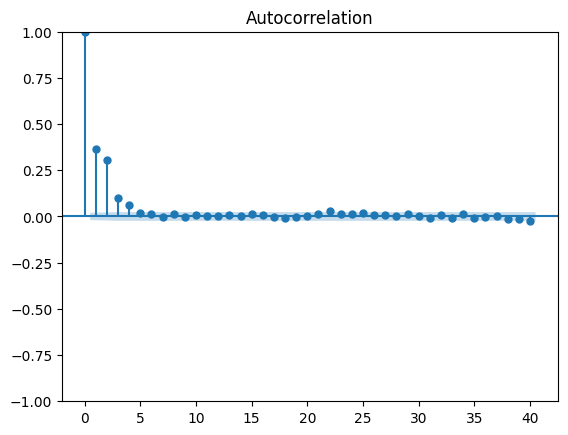

In [17]:
plot_acf(data_ARMA_22)
plt.show()

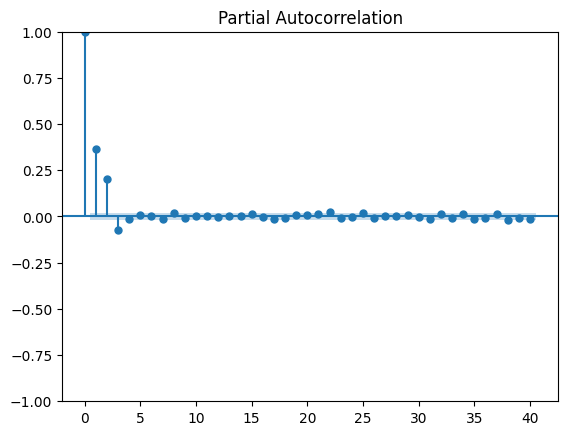

In [18]:
plot_pacf(data_ARMA_22)
plt.show()